In [1]:
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system
from pandas.core.algorithms import value_counts     #Extra import voor value_counts xx
from scipy import stats
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ais = pd.read_csv("https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv")


ais.set_index(['PassengerId'])        # set index/id
ais.Survived= ais.Survived.astype('category')             #Gaat de numerieke waarden van deze kolom aanschouwen als een categorie


ais.head()


# **Hoofdstuk 1** 



Categoriën ordenen/categorie ordinaal maken

In [ ]:
embarked_type = CategoricalDtype(categories=['S','C','Q'], ordered=True)
ais.Embarked= ais.Embarked.astype(embarked_type)
ais.Embarked.describe()

Bepaalde kolommen selecteren

In [ ]:
ais[["PassengerId","Survived","Name"]]            ##Dubbele haken!!!
ais[ais['PassengerId'] < 6][["PassengerId",'Survived', 'Name']]          #Combinatie met if-else 
ais[(ais.sport == 'Netball')&('wt' == 63)]                               #combinatie van 2x if-else

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')

In [ ]:
print(ais.ferr.describe())
print('='*50)

In [ ]:
#quality of Life 
                                          ##Geeft een overzicht van alle variabelen
ais.sport.value_counts()                  ##Handig voor als je ze moet overtyppen voor een if-else case bijvoorbeeld                     

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

In [ ]:
ais[ais.bmi >26 ] ['sport'].value_counts()            #gaat alle waardes dat hiertoe behoeren en overeen komen met elkaar samen tellen

# **Hoofdstuk 2 Grafieken tekenen**


## grafieken

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')
ais = ais.set_index(['id'])
ais.sex=ais.sex.astype('category')
ais.sport=ais.sport.astype('category')

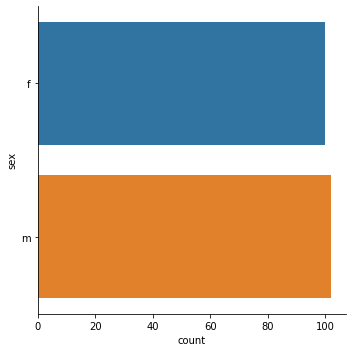

In [ ]:
sns.catplot(data=ais,kind="count",y="sex")

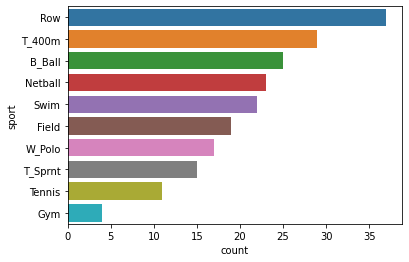

In [ ]:
#sns.catplot(data=ais,kind="count",y="sport")                                     #not sorted
sns.countplot(data=ais, y="sport", order = ais.sport.value_counts().index)        #sorted

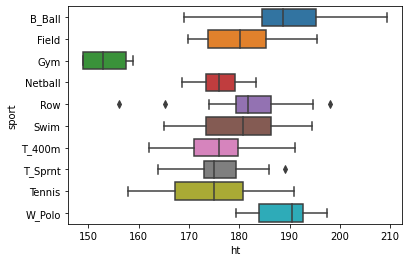

In [ ]:
sns.boxplot(data=ais,x='ht',y='sport')

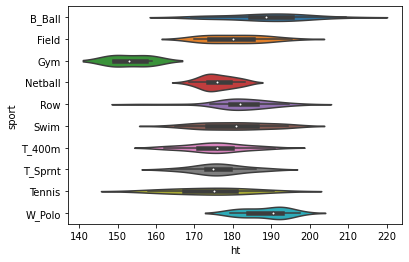

In [ ]:
sns.violinplot(data=ais,x='ht',y='sport')

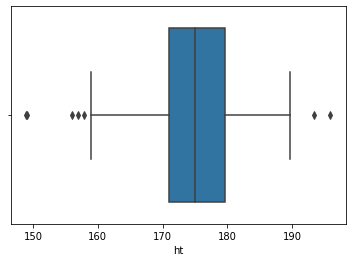

In [ ]:
sns.boxplot(data=ais[ais.sex=='f'],x='ht')

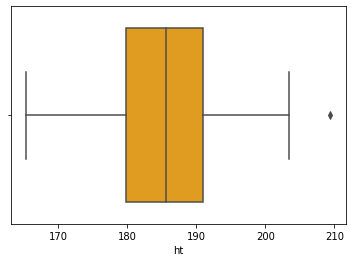

In [ ]:
sns.boxplot(data=ais[ais.sex=='m'],x='ht',color='orange')

## oefening 

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')
ais = ais.set_index(['id'])
ais.sex=ais.sex.astype('category')
ais.sport=ais.sport.astype('category')

In [ ]:
# ais[(ais.sport=='Row')|(ais.sport=='Netball')|(ais.sport=='Tennis')].ht.describe()     #Zonder tussenstap


data=ais[(ais.sport=='Row')|(ais.sport=='Netball')|(ais.sport=='Tennis')]               #met tussenstap
print(data.ht.describe())

count     71.000000
mean     179.066197
std        7.936371
min      156.000000
25%      174.250000
50%      179.500000
75%      183.400000
max      198.000000
Name: ht, dtype: float64


In [ ]:
data=ais[(ais.sport=='Row')|(ais.sport=='Netball')|(ais.sport=='Tennis')]
print(data.sex.describe())


count     71
unique     2
top        f
freq      52
Name: sex, dtype: object


## lab 02 

In [ ]:
ais.groupby('sport')['sex'].value_counts() #Groupby gebruiken


sport     
B_Ball   f    13
         m    12
Field    m    12
         f     7
Gym      f     4
         m     0
Netball  f    23
         m     0
Row      f    22
         m    15
Swim     m    13
         f     9
T_400m   m    18
         f    11
T_Sprnt  m    11
         f     4
Tennis   f     7
         m     4
W_Polo   m    17
         f     0
Name: sex, dtype: int64

In [ ]:
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


## Functies

In [ ]:
mpg = sns.load_dataset("mpg")      # Characteristics of cars
tips = sns.load_dataset("tips")    # Info on tips given at restaurants

In [ ]:
#lange versie

print(f"Mean:                {tips['tip'].mean()}")
print(f"Standard deviation:  {tips['tip'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {tips['tip'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {tips['tip'].skew()}")
print(f"Kurtosis:            {tips['tip'].kurtosis()}")

# Median & co
print(f"Minimum:   {tips['tip'].min()}")
print(f"Median:    {tips['tip'].median()}")
print(f"Maximum:   {tips['tip'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", tips['tip'].quantile(percentiles))
print("Inter Quartile Range:", tips['tip'].quantile(.75) - tips['tip'].quantile(.25))
print(f"Range :    {tips['tip'].max() - tips['tip'].min()}")

In [ ]:
#korte versie
tips["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

# **Hoofdstuk 3 Normaalverdeling + T-verdeling** 

## Normaalverdeling functies



In [ ]:
mu= 5             #gemiddelde
sigma = 1.5       #deviatie
x = 6             #x-waarde
p=0.40            #percentage

In [ ]:
#probabilty density function: berekend de Y-waarde die overeenkomt met x (is niet hetzelfde als een kans)

pdf_value = stats.norm.pdf(x, loc=mu, scale=sigma)   
print(pdf_value)

#Cumulatieve distributie functie: kans dat een waarde kleiner is dan x (berekend de oppervlakte onder de curve)
#cdf_value= stats.norm.cdf(x, loc=mu, scale=sigma)
#print(cdf_value)

#Survival function: kans dat de waarde groter is dan x
sf_value= stats.norm.sf(x, loc=mu, scale=sigma)
print(sf_value)


#Inversed survival function: x waarde dat komt overeen met het (meegegeven) percentage   
#ipv het percentage te berekenen, gaat deze de x-waarde berekenen (omgekeerde van de sf-function)

isf_value = stats.norm.isf(sf_value, loc=mu, scale=sigma)
print(isf_value)



0.2129653370149015
0.2524925375469229
6.0


## Centrale limiet stelling


###aantonen dat de gemiddeldes een normaal verdeling zijn

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/ais.csv')


In [ ]:
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


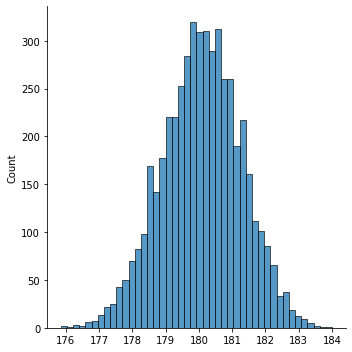

In [ ]:
arr =np.array([])
for i in range(5000):
  arr=np.append(arr,ais['ht'].sample(n=50).mean())

sns.displot(arr)

### werken met centrale limietstelling

In [ ]:
mu= 12.1             #gemiddelde
sigma = 3.8/math.sqrt(43)       #deviatie van sample/sample grootte = deviatie
x = 11             #x-waarde
p=0.40            #percentage


In [ ]:
cdf_value= stats.norm.cdf(x, loc=mu, scale=sigma)
print(cdf_value)

0.02883448270747309


## Normaal verdeling (Betrouwbaarheidsinterval + Z-score)



In [ ]:
sample = np.array([123,22,55,44,66,45,8489,5,4,84,35,4,84,5,43,84,3,354,354,546,2134,8943,4849])

m= 5.2                          #Sample mean                                  m=(sample.mean())
s= 1.5                          #Populatie standaardafwijking/sigma
n= 100                          #Sample size                                  n=sample_size=len(sample)
alpha= 0.5                      #1-alpha = betrouwbaarheids gebied (95%)
x = 5.4                         #meegegeven variabele

In [ ]:
z_score=(x-m)/s                                         #z-score berekenen
print("Z-score voor %.1f is: %.2f" % (x,z_score))


z_alpha_div2=stats.norm.isf(alpha/2)                         #alpha/2 bereken
#z_alpha_div2=stats.t.isf(alpha/2,n-1)                       #enkel gebruiken indien de s van de populatie onbekend is of n<30 
print("z_alpha/2: %f.5" % z_alpha_div2)                      #getal dat overeenkomt met alpha/2 op de norm



lower_limit =m - (z_alpha_div2*s / math.sqrt(n))               #Betrouwbaarheids interval berekenen
upper_limit =m + (z_alpha_div2*s / math.sqrt(n))


print("Confidence interval: [%.5f ,%.5f]" % (lower_limit,upper_limit))


Z-score voor 5.4 is: 0.13
z_alpha/2: 0.674490.5
Confidence interval: [5.09883 ,5.30117]


## T-verdeling


In [ ]:
m= 5.2                #Sample mean                                  m=(sample.mean())
s= 1.5              #Populatie standaardafwijking/sigma
n = 15               #Sample size                                  n=sample_size=len(sample)
alpha=0.05          #1-alpha = betrouwbaarheids gebied (95%)

In [ ]:
t = stats.t.isf(alpha/2, df=n-1)                #T-score berekenen
print("T-score: %.5f" % t)


lower_limit= m - (t*s / math.sqrt(n))
upper_limit= m + (t*s / math.sqrt(n))

print("Confidence interval: [%.5f ,%.5f]" % (lower_limit,upper_limit))


T-score: 2.14479
Confidence interval: [4.36933 ,6.03067]


## Grafiek plotten


### normaal verdeling plotten

In [ ]:
m = 2.5
s = 1.5
x1 = 0.5
x2 = 4

oppervlakte onder de grafiek:0.75013



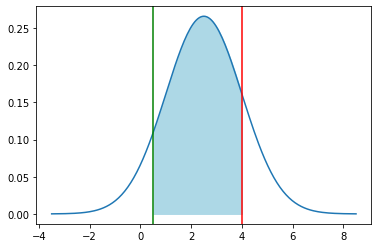

In [ ]:
a = stats.norm.cdf(x1,loc=m,scale=s)
b= stats.norm.cdf(x2,loc=m,scale=s)
print("oppervlakte onder de grafiek:%.5f" % (b-a))
print("")

x = np.linspace(m - 4*s, m + 4*s,201)
y=stats.norm.pdf(x, m, s)
plt.plot(x,y)
# Left tail probability plot


# Fill the area left of x
plt.fill_between(x, 0, y, where=(x1 <= x) &(x2>=x), color='lightblue')
# Show the mean with an orange line
# plt.axvline(m, color="orange", lw=2)                              %toont het gemiddelde
# Show x with a green line
plt.axvline(x1, color="green")
plt.axvline(x2, color="red")



#bonus
#y_cdf = stats.norm.cdf(x,loc=m,scale=s)                                  #De kans dat de het getal kleiner zou zijn dan de x waarde op dat moment (wanneer je op het gemiddelde zit is y = 0.5 dan heb je 50% kans dat de waarde kleiner is dan x/gemiddelde (op dit moment))
#plt.plot(x,y_cdf)                                                        #Wanneer y=1 heb je 100% kans dat de waarde gelijk kleiner is dan x

###T-verdeling plotten

In [ ]:
m = 0
s = 1
x1 = 0.5
x2 = 4
df = 3            #Aantal vrijheidsgraden

oppervlakte onder de grafiek:0.31172



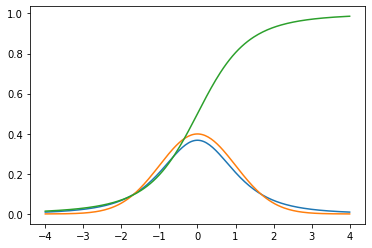

In [ ]:
a = stats.t.cdf(x1,df=df)
b= stats.t.cdf(x2,df=df)
print("oppervlakte onder de grafiek:%.5f" % (b-a))
print("")

x = np.linspace(m - 4*s, m + 4*s,201)
t=stats.t.pdf(x, df)
plt.plot(x,t)
# Left tail probability plot


# Fill the area left of x
#plt.fill_between(x, 0, t, where=(x1 <= x) &(x2>=x), color='lightblue')
# Show the mean with an orange line
# plt.axvline(m, color="orange", lw=2)                              %toont het gemiddelde
# Show x with a green line
#plt.axvline(x1, color="green")
#plt.axvline(x2, color="red")
y=stats.norm.pdf(x, m, s)
plt.plot(x,y)
#bonus
t_cdf = stats.t.cdf(x,df)                                  #De kans dat de het getal kleiner zou zijn dan de x waarde op dat moment (wanneer je op het gemiddelde zit is y = 0.5 dan heb je 50% kans dat de waarde kleiner is dan x/gemiddelde (op dit moment))
plt.plot(x,t_cdf)                                                        #Wanneer y=1 heb je 100% kans dat de waarde gelijk kleiner is dan x

## Oefening theorie vs praktijk





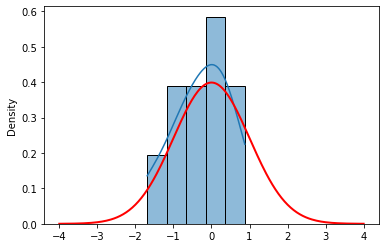

In [ ]:
n=10                   #Hoe groter n hoe nauwkeuriger dat de observaties gaan zijn
m=0
s=1

observaties = np.random.normal(loc = m ,scale=s,size=n)              #neemt n random waarden van de T-verdeling

obs_hist = sns.histplot(observaties,stat='density', kde=True)        #toont de verdeling en histogram van de uitkozen waarden


x_dist = np.linspace(m-4*s,m+4*s, num=201)
dist_y = stats.norm.pdf(x_dist,m,s)
obs_hist.plot(x_dist, dist_y,'red', lw=2)                           #toont de t-verdeling van de waarden


rode lijn is theorie 

blauw is praktijk

## oefeningen

### Excercise 1

oppervlakte onder de grafiek:0.75013



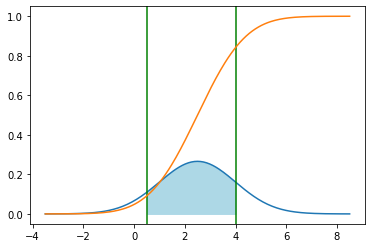

In [ ]:
m = 2.5
s = 1.5
x1 = 0.5
x2 = 4

a = stats.norm.cdf(x1,loc=m,scale=s)
b= stats.norm.cdf(x2,loc=m,scale=s)
print("oppervlakte onder de grafiek:%.5f" % (b-a))                  #Oppervlakte berekenen
print("")

x = np.linspace(m - 4*s, m + 4*s,201)
y=stats.norm.pdf(x, m, s)
plt.plot(x,y)
# Left tail probability plot


# Fill the area left of x
plt.fill_between(x, 0, y, where=(x1 <= x) &(x2>=x), color='lightblue')
# Show the mean with an orange line
# plt.axvline(m, color="orange", lw=2)                              %toont het gemiddelde
# Show x with a green line
plt.axvline(x1, color="green")
plt.axvline(x2, color="green")


y_cdf = stats.norm.cdf(x,loc=m,scale=s)
plt.plot(x,y_cdf)

### Exercise 2

kans dat x kleiner is dan 22.00 is 0.84
kans dat x tussen x1 en x2 ligt is 0.82
kans dat x groter is dan x3 is 0.69
Z-score: -2.25
Z-score: 1.50


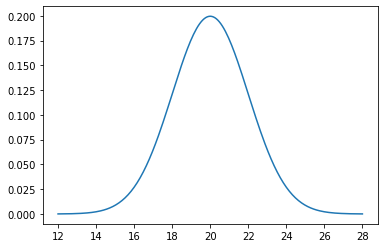

In [ ]:
n=64
m= 20
s=16/math.sqrt(n)
x1=22
x2=16
x=np.linspace(m - 4*s, m + 4*s,201)
y=stats.norm.pdf(x,m,s)
plt.plot(x,y)



a= stats.norm.cdf(x1, loc=m, scale=s)
print("kans dat x kleiner is dan %.2f is %.2f" % (x1,a))
b=stats.norm.cdf(x2, loc=m, scale=s)
print("kans dat x tussen x1 en x2 ligt is %.2f" %(a-b))
print("kans dat x groter is dan x3 is %.2f" % stats.norm.sf(19,loc=m,scale=s))


z1=(15.5-m)/s
print("Z-score: %.2f" % z1)

z2=(23-m)/s
print("Z-score: %.2f" % z2)

###Exercise 3

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/rlanders.csv').set_index(["ID"])
df.head

In [ ]:
s=df['Money'][:25].std()                                      #gebruikt enkel de eerste 25 waarden nemen van df
n=25
m=df['Money'][:25].mean()
alpha= 0.05

z_alpha_div2=stats.t.isf(alpha/2,n-1)                         #alpha/2 bereken    
print("alpha/2: %f.5" % z_alpha_div2)                        

lower_limit =m - (z_alpha_div2*s / math.sqrt(n))               #Betrouwbaarheids interval berekenen
upper_limit =m + (z_alpha_div2*s / math.sqrt(n))


print("Confidence interval: [%.5f ,%.5f]" % (lower_limit,upper_limit))

alpha/2: 2.063899.5
Confidence interval: [450.29121 ,536.66879]


# **Hoofdstuk 3 Hypothese testing** 

## Z-test

###Rechtzijdige Z-toets

In [ ]:
n=40
m=351.2
s=4.1
m_sample = 352.8                                   #Gemiddelde dat wordt waargenomen
s_sample = s/math.sqrt(n)       
significance = 0.05                                  #Significantie niveau 

de kans dat m_sample kleiner is dan 352.80 is 0.01
p_value > significance
0.01 > 0.05
Grens waarde > m_sample
 352.27 > 352.80


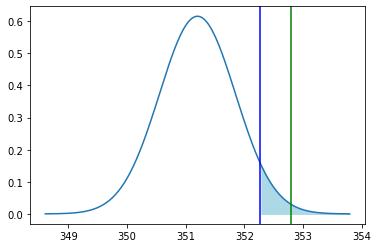

In [ ]:
#methode 1 
p_value = stats.norm.sf(m_sample, loc=m, scale=s_sample)
print("de kans dat m_sample kleiner is dan %.2f is %.2f" % (m_sample,p_value))      #indien p_value kleiner is dan significantie niveau(5%) verwerpen hypothese
print("p_value > significance")
print("%.2f > %.2f" % (p_value,significance))


#methode 2 eerst grenswaarde berekenen adhv significnatie niveau (5%) en kijken of deze waarde kleiner is dan m_sample
g_value = stats.norm.isf(significance, m, s_sample)                                    #grens waarde
print("Grens waarde > m_sample")                                                #indien g_value kleiner dan m_sample verwerpen hypothese
print(" %.2f > %.2f" % (g_value,m_sample))


#tekening maken
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x >= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen

###Linkszijdige Z-test

In [ ]:
n=40
m=351.2
s=4.1
m_sample = 350.4                                  #Gemiddelde dat wordt waargenomen
s_sample = s/math.sqrt(n)       
significance = 0.05                                  #Significantie niveau 

de kans dat m_sample kleiner is dan m is 0.11
p_value > significance
0.11 > 0.05
m_sample > g_value
350.40 > 350.13


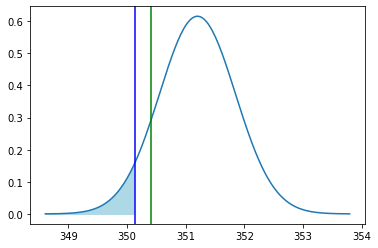

In [ ]:
#methode 1 
p_value = stats.norm.cdf(m_sample,loc=m,scale=s_sample)
print("de kans dat m_sample kleiner is dan m is %.2f" % p_value)             #indien p_value kleiner is dan significance (5%) -> nulhypothese verwerpen
print("p_value > significance")
print("%.2f > %.2f" % (p_value,significance))


#methode 2 
g_value = stats.norm.isf(1-significance,loc=m,scale=s_sample)                #!!!!(1-significance)
print("m_sample > g_value")                                                  #indien m_sample kleiner is dan nulhypothese verwerpen
print("%.2f > %.2f" % (m_sample,g_value))



#tekening
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x <= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen nulhypothese

### Dubbelzijdige Z-test

In [ ]:
n=40
m=351.2
s=4.1
m_sample = 351.4                                  #Gemiddelde dat wordt waargenomen
s_sample = s/math.sqrt(n)       
significance = 0.05                                  #Significantie niveau 


de kans dat m_sample kleiner is dan 351.40 is 0.38
significane < p_value < significance
0.03 < 0.38 < 0.97
grens waarde < m_sample < grenswaarde
349.93 < 351.40 < 352.47


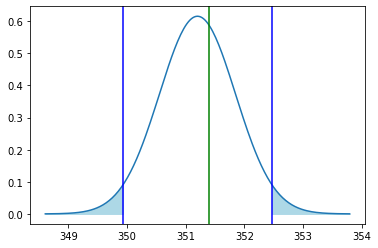

In [ ]:
#methode 1 
p_value = stats.norm.sf(m_sample, loc=m, scale=s_sample)


print("de kans dat m_sample kleiner is dan %.2f is %.2f" % (m_sample,p_value))      #indien niet tussen de waarden ligt dan verwerpen hypothese
print("significane < p_value < significance")
print("%.2f < %.2f < %.2f" % (significance/2,p_value,1-significance/2))


#methode 2 eerst grenswaarde berekenen adhv significnatie niveau (5%) en kijken of deze waarde kleiner is dan m_sample
g_upper = stats.norm.isf(significance/2, m, s_sample)                                    #grens waarde
g_lower = stats.norm.isf(1-significance/2,loc=m,scale=s_sample)
print("grens waarde < m_sample < grenswaarde")                                                         #indien m_sample niet tussen de waarde ligt dan verwerpen hypothese
print("%.2f < %.2f < %.2f" % (g_lower,m_sample,g_upper))


#tekening maken
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x >= g_upper,color='lightblue')
plt.fill_between(dist_x,dist_y, where=dist_x <= g_lower,color='lightblue')

plt.axvline(x=g_upper, color='blue')
plt.axvline(x=g_lower, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #windien groen in het blauw ligt = verwerpen

## oefeningen

###Exercise 1 Rechtzijdige T-test

de kans dat m_sample kleiner is dan m is 0.00
p_value > significance
0.000000 > 0.05
m_sample > g_value
52.33 > 76.71


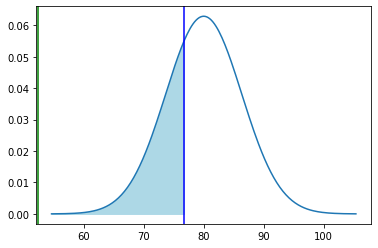

In [ ]:
pulses = [48,52,59,45,57,52,44,58,56,44,63,50]

n=len(pulses)
m=80
s=9
m_sample = np.mean(pulses)
s_sample = np.std(pulses, ddof=1)
significance = 0.05
#methode 1 
p_value = stats.t.cdf(m_sample, loc=m, scale = s_sample/math.sqrt(n), df=n-1)
print("de kans dat m_sample kleiner is dan m is %.2f" % p_value)             #indien p_value kleiner is dan significance (5%) -> nulhypothese verwerpen
print("p_value > significance")
print("%f > %.2f" % (p_value,significance))


#methode 2 
g_value = stats.t.isf(1-significance,loc=m,scale=s_sample/math.sqrt(n), df=n-1)                #!!!!(1-significance)
print("m_sample > g_value")                                                  #indien m_sample kleiner is dan nulhypothese verwerpen
print("%.2f > %.2f" % (m_sample,g_value))



#tekening
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x <= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen nulhypothese




### Exercise 2

45.432100618494665
0.001302346104883357


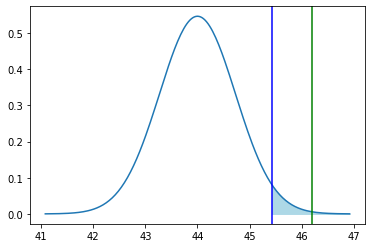

In [ ]:
m=44
s=6.2
n=72
m_sample= 46.2
s_sample = s/math.sqrt(n)
significance = 0.025

#1.
g_value=stats.norm.isf(significance,loc=m,scale=s_sample)
print(g_value)


#2.
p_value = stats.norm.sf(m_sample, loc = m, scale = s_sample)
print(p_value)

#tekening maken
dist_x=np.linspace(m - 4 * s_sample,m + 4 * s_sample,num=201)
dist_y= stats.norm.pdf(dist_x,m,s_sample)

plt.plot(dist_x,dist_y)
plt.fill_between(dist_x,dist_y, where=dist_x >= g_value,color='lightblue')
plt.axvline(x=g_value, color='blue')
plt.axvline(x=m_sample, color='green')                                                  #indien groen in het blauw ligt = verwerpen

###Excercise 3



In [ ]:
arr=[400,350,400,500,300,350,200,500,200,250,250,500,350,100]

m=300
n=len(arr)
m_sample = np.mean(arr)
s_sample = np.std(arr, ddof=1) / math.sqrt(n)
significance = 0.05

p_value = stats.t.sf(m_sample, loc=m, scale=s_sample, df=n-1)
print(p_value)

g_value = stats.t.isf(significance, loc=m, scale=s_sample, df=n-1)
g_value



0.1738147584626205


358.41687132781624

###Excercise 4

In [ ]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/rlanders.csv')
rlanders.head()

,ID,Gender,Money,Days,Months,Count,Survey
0,1,Female,440,29,11,35,3
1,2,Female,503,23,10,52,3
2,3,Male,412,16,11,55,3
3,4,Male,587,25,9,28,5
4,5,Male,525,30,11,41,4


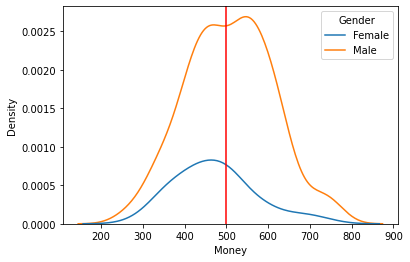

In [ ]:
m=500
s=98
m_sample = rlanders['Money'].mean()
significance = 0.05

sns.kdeplot(data= rlanders, x='Money',hue='Gender' )
plt.axvline(m_sample, color="red")

In [ ]:
#men 
n1=rlanders[rlanders['Gender'] == 'Male']['Money'].count()
m_sample1= rlanders[rlanders['Gender'] == 'Male']['Money'].mean()


p_value1= stats.norm.sf(m_sample1,loc=m,scale=s/math.sqrt(n1))
print(p_value1)

g_value1 = stats.norm.isf(significance,loc=m,scale=s/math.sqrt(n1))
print(g_value1)

#women
n2=rlanders[rlanders['Gender'] == 'Female']['Money'].count()
m_sample2= rlanders[rlanders['Gender'] == 'Female']['Money'].mean()


p_value2= stats.norm.cdf(m_sample2,loc=m,scale=s/math.sqrt(n2))
print(p_value2)

g_value2 = stats.norm.isf(1-significance,loc=m,scale=s/math.sqrt(n2))
print(g_value2)

0.1396357338827816
511.45567640449514
0.01988789146266692
477.64618457402185


#**Hoofdstuk 4 Twee kwantitatieve variabelen**

## Crosstable 

In [ ]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/rlanders.csv')

In [ ]:
o = pd.crosstab(rlanders.Survey, rlanders.Gender)

chi2,p,df,e= stats.chi2_contingency(o)                                          #expected table opzetten op basis van observed
print("chi²: %.2f" % chi2)
print("p_value: %.2f" % p)
print("df: %d" % df)
print(f"{e}")


Gender  Female  Male
Survey              
1            0     4
2           17    45
3           23    91
4           12    53
5            0     5
chi²: 4.26
p_value: 0.37
df: 4
[[ 0.832  3.168]
 [12.896 49.104]
 [23.712 90.288]
 [13.52  51.48 ]
 [ 1.04   3.96 ]]


##Goodness of fit test



In [ ]:
o= np.array([127,75,98,27,73])
e_p= np.array([.35, .17,.23,.08,.17])
e= e_p * sum(o)
chi2,p=stats.chisquare(f_obs=o, f_exp=e )
print("chi2: %.2f"%chi2)
print("p: %.2f", p)

chi2: 3.47
p: %.2f 0.4827710008728282


##

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/MuziekWijn.csv')
df.head()

In [ ]:
df = df.rename(columns={' Wijn': 'Wijn'})
df.columns


In [ ]:
o = pd.crosstab(df.Muziek,df.Wijn)
o

In [ ]:

#marginale totalen bereken
row_sums = o.sum(axis=1)
col_sums = o.sum()
n=row_sums.sum()

print(row_sums)
print(col_sums)
print('aantal observaties: %d' %n)

In [ ]:
#expected tabel opstellen

e= np.outer(row_sums,col_sums)/n
print(e)

e_row_sums = e.sum(axis = 1)
e_col_sum = e.sum(axis = 0)
n = e_row_sums.sum()

print(e_row_sums)
print(e_col_sum)
print('aantal observaties: %d' %n)


In [ ]:
#chi² berekenen

diffs = (e-o)**2/e                                    #Spreiding berekenen
print(diffs)

chi2 = diffs.values.sum()
print("chi-kwadraat: %.2f" %chi2)